# 목표: 예측 컴피티션, 중간은 가보자!

In [1]:
# matplotlib은 python의 대표적인 시각화 라이브러리입니다. 이렇게 해줘야 주피터 노트북 내에서 matplotlib이 그린 그래프를 볼 수 있어요.
# 그래프는 아래 내리시다보면 있습니다!
%matplotlib inline

In [2]:
# 판다스는 일반적으로 이렇게 임포트합니다.
import pandas as pd

In [3]:
# 로컬에 있는 csv 파일 읽기.
train = pd.read_csv('./funda_train.csv') # 내파일이 어디에 위치했는 지 알고 실행시키기

In [ ]:
# train.head(2)

In [ ]:
# train.regin.()

In [ ]:
# train.['type_of_business']
# train['trasacted_date'].min()
# train['trasacted_date'].max()

# 문제

## 상점별 매출예측
핀테크 기업인 ‘FUNDA(펀다)’는 상환 기간의 매출을 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 상점들에 금융 기회를 제공하려 합니다.  
이번 대회에서는  2년 전 부터 2019년 2월 28일까지의 카드 거래 데이터를 이용해 **2019-03-01부터 2019-05-31까지의 각 상점별 3개월 총 매출을 예측**하는 것입니다.

# Data description
1. store_id : 상점의 고유 아이디
2. card_id : 사용한 카드의 고유 아이디
3. card_company : 비식별화된 카드 회사
4. trasacted_date : 거래 날짜
5. transacted_time : 거래 시간( 시:분 )
6. installment_term : 할부 개월 수( 포인트 사용 시 (60개월 + 실제할부개월)을 할부개월수에 기재한다. ) 6- 애들은 포인트 사용한 값들
7. region : 상점의 지역
8. type_of_business : 상점의 업종
9. amount : 거래액(단위는 원이 아닙니다)

In [4]:
# train

In [5]:
# 컬럼별 데이터의 타입
'''
store_id, card_id, installment_term: 정수형
card_company, transacted_date, transacted_time, region, type_of_business: 문자열
amount: 실수형
'''
# 데이터타입을 보는 습관을 들이면 좋다 
train.dtypes

store_id              int64
card_id               int64
card_company         object
transacted_date      object
transacted_time      object
installment_term      int64
region               object
type_of_business     object
amount              float64
dtype: object

In [ ]:
train['card_company'].unique()

In [ ]:
len(train)
len(train['store_id'])
# print('length of train: ' +  str(len(train))) 

In [6]:
# 데이터 길이, 가짓수 등. unique() 함수
print('Length of Train: ' + str(len(train))) #len함수는 정수 형이니까 str로 감싸줘서 문자형으로 바꿔줌 
print('Store Id: ' + str(len(train['store_id'].unique())))
print('Type of Business: ' + str(len(train['type_of_business'].unique())))
print('Card Id: ' + str(len(train['card_id'].unique())))
print('Transacted Date: ' + str(len(train['transacted_date'].unique())))

Length of Train: 6556613
Store Id: 1967
Type of Business: 146
Card Id: 3950001
Transacted Date: 1003


In [7]:
# 데이터가 언제부터 언제까지 있는지? min(), max() 함수
print('first date of log: ' + train['transacted_date'].min())
print('last date of log: ' + train['transacted_date'].max())

first date of log: 2016-06-01
last date of log: 2019-02-28


In [8]:
# train['type_of_business'].unique()
train['card_company'].unique()

array(['b', 'h', 'c', 'a', 'f', 'e', 'g', 'd'], dtype=object)

In [ ]:
train.isnull().sum() * 100 / len(train)

# Missing Values
* region에는 30%, type_of_business에는 60% 정도 null이 있네요. 어떻게 할지는 좀 더 생각을 해봅시다.

In [9]:
train.isnull().sum() * 100 / len(train)

store_id             0.000000
card_id              0.000000
card_company         0.000000
transacted_date      0.000000
transacted_time      0.000000
installment_term     0.000000
region              31.155812
type_of_business    60.284311
amount               0.000000
dtype: float64

# Outlier
* 이것도 모델에 어떻게 반영할건지는 좀 더 생각을 해봅시다.

In [10]:
train['amount'].describe()
# 잘못된 데이터가 있을 수도 있으서 describe로 찍어보기 
# 결제한건데 왜 최소값이 - 가 나오는 걸까? (이상하거나 잘못된 데이터 혹은 실수 -> 알고보니 - 값은 결제 취소 )

count    6.556613e+06
mean     1.043511e+04
std      3.104031e+04
min     -2.771429e+06
25%      2.142857e+03
50%      4.285714e+03
75%      8.571429e+03
max      5.571429e+06
Name: amount, dtype: float64

In [11]:
print(train['amount'].min())
print(train['amount'].quantile(0.01))
print(train['amount'].quantile(0.99))
print(train['amount'].max())

-2771428.5714285714
-157.1428571428571
108571.42857142855
5571428.571428572


## Winsorize

In [12]:
# Setting cap
amount_min = train['amount'].quantile(0.01)
amount_max = train['amount'].quantile(0.99)

In [13]:
train['amount_winsorized'] = train['amount'].apply(lambda x: max(min(x, amount_max), amount_min))

In [14]:
train.head(2)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,amount_winsorized
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,857.142857


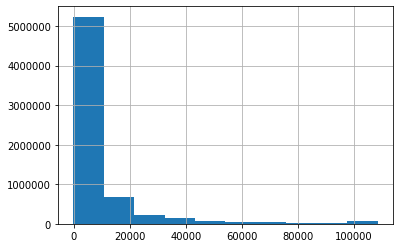

In [15]:
train['amount_winsorized'].hist()

# Seasonality
* yearly seasonality, monthly seasonality가 명확하게 보이는 데이터인가?
- 2018년 3월부터 5월까지의 총량을 구해서 제출 : 중간 단계 
- 더 하고 싶다면? 상승 트렌드를 분석해서 예측 / 혹은 주 트렌드를 구해서 예측 

# forcast 예측하기 위해 데이터가 필요한 분야 
- 기사나 물량을 예측해야 고용할 수 있음 
- 어떤 상품이나 차량을 준비할 수 있음 
- 가장 베이직한 해법 : seasonality : 데이터가 어떻게 요동치는 가 볼 수 있음 
- (년/달/주/일마다의 트렌드 - 직장인 월급날, 주말 시간 많을 때, 출퇴근, 점심시간, 11시 59분 등등 ) 

In [16]:
train = train.reset_index()

In [17]:
transaction_day = train.groupby(['transacted_date']).agg({'index':'size', 'amount':'sum'}).reset_index()

In [18]:
transaction_day.head(2)

,transacted_date,index,amount
0,2016-06-01,4789,6.520140e+07
1,2016-06-02,4953,5.711538e+07


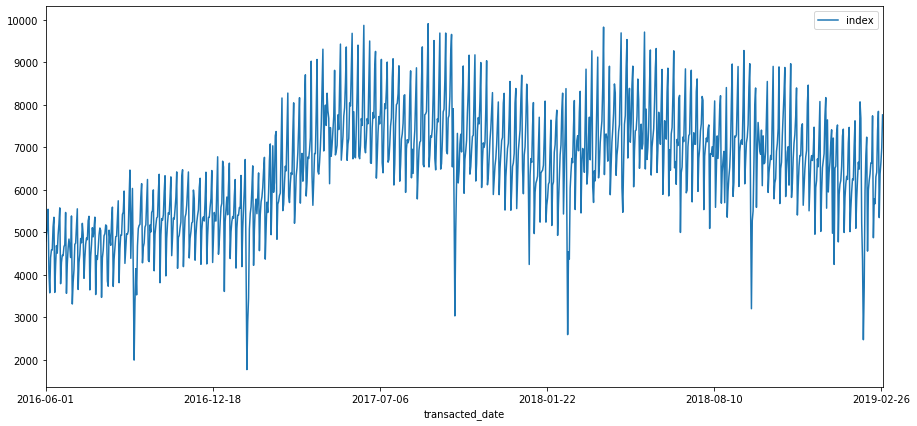

In [19]:
# 뭔가 오르락 내리락에 패턴이 있어 보이네요

transaction_day.plot(x='transacted_date', y='index', figsize=(15, 7))

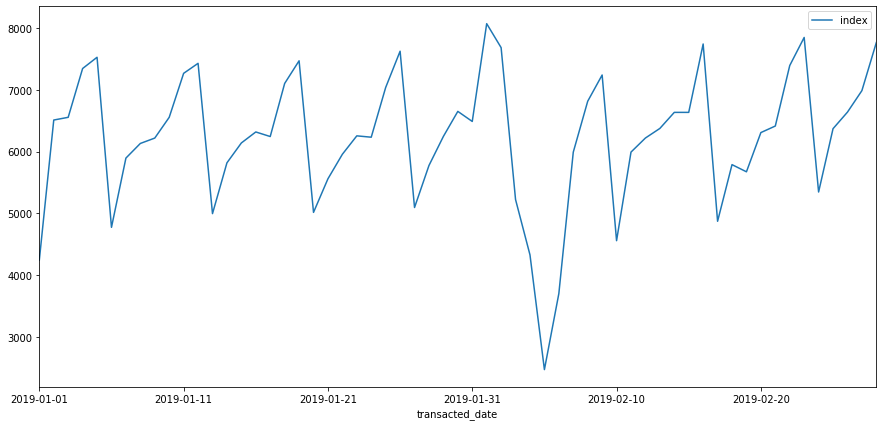

In [63]:
# 주 단위 Seasonality는 명확하게 보이네요. 그런데 매출이 저렇게 푹 꺼진데는 무슨일이 있었던 걸까요?
transaction_day.set_index('transacted_date').loc['2019-01-01':,:].plot(y='index', figsize=(15,7))

## 또 다른 패턴?

In [22]:
train['transacted_date_month'] = train['transacted_date'].apply(lambda x: x[:7])

In [23]:
train_groupby_month = train.groupby(['transacted_date_month'])['amount'].sum()

In [24]:
import matplotlib.pyplot as plt

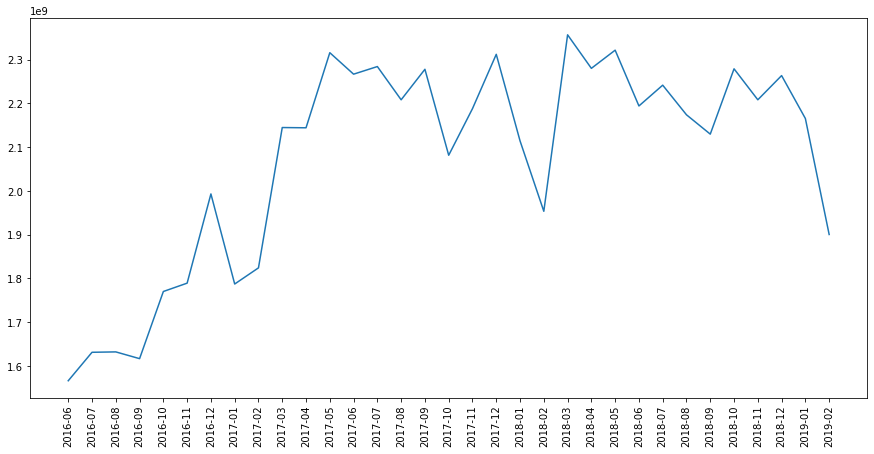

In [26]:
plt.figure(figsize=(15,7))
plt.plot(train_groupby_month)
plt.xticks(rotation='vertical')
plt.show()

## 데이터를 연도별로 따로 보면 패턴이 더 잘 보일 것 같다.

In [28]:
train['transacted_date'] = pd.to_datetime(train['transacted_date'])

In [32]:
train['transacted_year'] = train['transacted_date'].apply(lambda x: x.year)
train['transacted_month'] = train['transacted_date'].apply(lambda x: x.month)

In [34]:
train_pivoted = train.pivot_table(index='transacted_month', columns='transacted_year', values='amount')

In [41]:
train_pivoted.columns = [str(c) for c in train_pivoted.columns]

In [48]:
train_pivoted = train_pivoted.reset_index()

In [58]:
[i+1 for i in list(range(12))]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

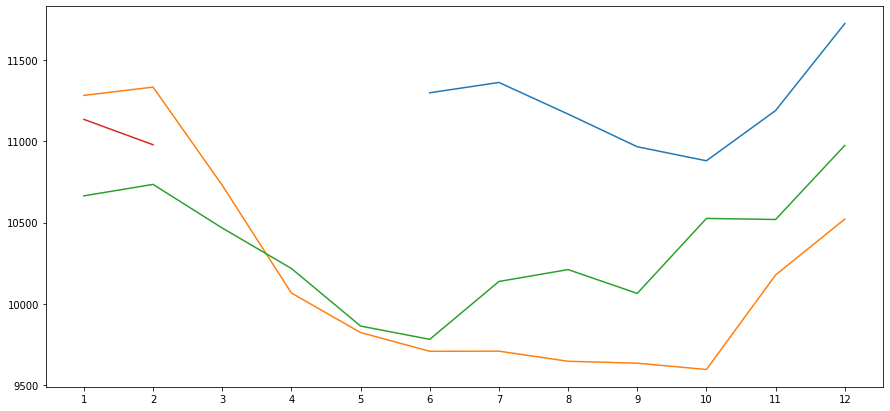

In [61]:
plt.figure(figsize=(15,7))
plt.plot('transacted_month', '2016', data=train_pivoted)
plt.plot('transacted_month', '2017', data=train_pivoted)
plt.plot('transacted_month', '2018', data=train_pivoted)
plt.plot('transacted_month', '2019', data=train_pivoted)
plt.xticks([i+1 for i in list(range(12))])
plt.show()

# 베이스라인
문제: 2019-03-01 ~ 2019-05-31 3개월 동안의 총 매출을 예측  
베이스라인: 2018-03-01 ~ 2018-05-31일 동안의 총 매출을 답으로 제출

In [133]:
train_last_year = train[(train['transacted_date'] >= '2018-03-01') & (train['transacted_date'] <= '2018-05-31')]

In [137]:
train_last_year.groupby(['store_id'])['amount'].sum().to_csv('./baseline.csv')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# 이외에 생각 해볼거리

### Q1. 업종전환을 한 가게가 있나요?

### Q2. 상점의 지역 별 분포는 어떻게 되나요?

### Q3. 상점의 업종 별 분포는 어떻게 되나요?

### Q4. 요일 별 매출은 어떻게 변하나요?

In [ ]:
train['transacted_date'][0] # str 타입 
pd.to_datetime(train['transacted_date']) # 이렇게 하면 문자였던 게 datetime 으로 바뀜 
pd.to_datetime(train['transacted_date']).year #연도만 뽑아줌 
pd.to_datetime(train['transacted_date']).weekday() # 근데 이렇게하면 좀 복잡하고 
pd.to_datetime(train['transacted_date']).apply(lambda x: x.weekday()) # 내가 선택한 컬럼의 원소들을 돌라가면서 먹이고 싶은 원소들을 먹이는 거

In [ ]:
train.coulumns

### Q5. 공휴일이 매출에 영향을 미치나요?

### Q6. 요일 별 Seasonality 말고, 또 다른 기간 별 패턴을 발견했나요?

### Q7. 새로운 질문을 던져보세요.